# Climate data
This code loads the `climetlab` package and sets the source and dataset to retrieve data from the Climate Data Store (CDS) for the ERA5 reanalysis dataset. The API configuration was performed following `https://cds.climate.copernicus.eu/api-how-to`.

`climetlab.load_source` ->  The `product_type` is set to `"reanalysis"`, and the `variable` is set to `"2m_temperature"` to retrieve temperature data at 2 meters above ground level (Kelvin), or `"total_precipitation"` represents the total precipitation rate and its units are meters per second (m s-1)
  The `year` is set to `2022`, and the `month` is set to a list containing `9`, `10`, and `11` to retrieve data for September, October, and November of 2022.
   The `day` and `time` are set to `"01"` and `"12:00"`, respectively, to retrieve data for the first day of each month at noon.
    The `area` parameter is set to `[38.72, -9.14, 38.72, -9.14]` to specify the coordinates for Lisbon.
    The data is then loaded into an xarray object using the `to_xarray()` method and printed to the screen.
    Is there anything else you would like to know?

# TODOS
* Add labels to plot
* How to integrate with model - only 1 value for the entire city, per hour

In [10]:
import climetlab as cml
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [2]:
hours_param = [f"0{i}:00" for i in range(0, 10)] + [f"{i}:00" for i in range(10, 24)]

In [3]:
# Set the source and dataset
source = cml.load_source("cds", "reanalysis-era5-single-levels",
                         product_type="reanalysis",
                         variable="2m_temperature",
                         year=2022,
                         month=[9, 10, 11],
                         day=list(range(1,31)),
                         time=hours_param,
                         area=[38.72, -9.14, 38.72, -9.14])

# Load the data
data_temp = source.to_xarray()

In [5]:
# total_precipitation represents the total precipitation rate and its units are meters per second (m s-1)
source = cml.load_source("cds", "reanalysis-era5-single-levels",
                         product_type="reanalysis",
                         variable="total_precipitation",
                         year=2022,
                         month=[9,10,11],
                         day=list(range(1,31)),
                         time=hours_param,
                         area=[38.72, -9.14, 38.72, -9.14])

# Load the data
data_precip = source.to_xarray()

In [7]:
# Convert the merged xarray object to a pandas DataFrame
df = data_temp.to_dataframe().reset_index()
df['tp'] =  data_precip.to_dataframe().reset_index()['tp']
# Set the time column as the index
df = df.set_index("time")

In [8]:
df

,number,step,surface,latitude,longitude,valid_time,t2m,tp
time,,,,,,,,
2022-09-01 00:00:00,0,0 days,0.0,38.72,-9.14,2022-09-01 00:00:00,291.621094,NaN
2022-09-01 01:00:00,0,0 days,0.0,38.72,-9.14,2022-09-01 01:00:00,291.286133,NaN
2022-09-01 02:00:00,0,0 days,0.0,38.72,-9.14,2022-09-01 02:00:00,290.988037,NaN
2022-09-01 03:00:00,0,0 days,0.0,38.72,-9.14,2022-09-01 03:00:00,290.770264,NaN
2022-09-01 04:00:00,0,0 days,0.0,38.72,-9.14,2022-09-01 04:00:00,290.410400,NaN
...,...,...,...,...,...,...,...,...
2022-11-30 19:00:00,0,0 days,0.0,38.72,-9.14,2022-11-30 19:00:00,287.555908,0.000000e+00
2022-11-30 20:00:00,0,0 days,0.0,38.72,-9.14,2022-11-30 20:00:00,287.107422,0.000000e+00
2022-11-30 21:00:00,0,0 days,0.0,38.72,-9.14,2022-11-30 21:00:00,286.808350,5.734568e-08


In [12]:
df_resampled = df.resample("5D").mean()
# Format the timestamps as strings with only the day and month
df_resampled.index = df_resampled.index.strftime("%d-%m")

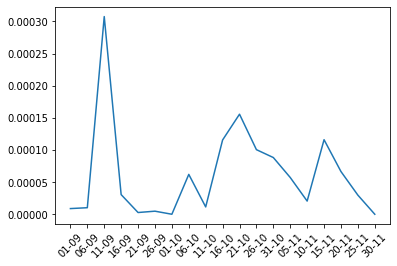

In [13]:
# Visualize flood in december
plt.plot(df_resampled.index, df_resampled['tp'])
plt.xticks(rotation=45)
plt.show()

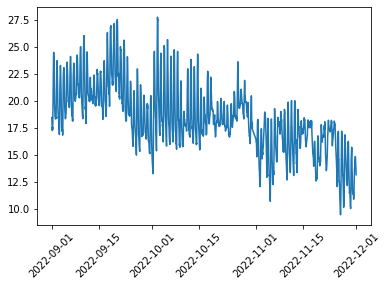

In [15]:
plt.plot(df.index, df['t2m']-273.15)
plt.xticks(rotation=45)
plt.show()

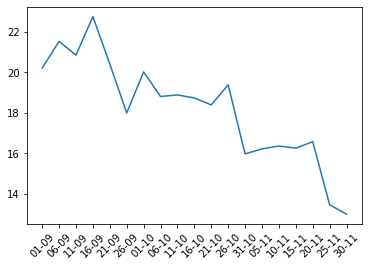

In [16]:
plt.plot(df_resampled.index, df_resampled['t2m']-273.15)
plt.xticks(rotation=45)
plt.show()